In [3]:
!pip install pandas --quiet
!pip install numpy --quiet
!pip install matplotlib --quiet
!pip install seaborn --quiet
!pip install XlsxWriter --quiet

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import re 
import json
import xlsxwriter

%matplotlib inline

In [5]:
df = pd.read_csv('GoogleDataManilaSupply.csv')

In [6]:
df.isna().sum()

input_id                 0
link                     0
title                    0
category                 2
address                  0
open_hours               0
popular_times            0
website               4027
phone                 1297
plus_code              965
review_count             0
review_rating            0
reviews_per_rating       0
latitude                 0
longitude                0
cid                      0
status                1271
descriptions          4897
reviews_link          1419
thumbnail               97
timezone                 0
price_range           4897
data_id                  0
images                   0
reservations          4897
order_online          4812
menu                     0
owner                    0
complete_address         0
about                 2984
user_reviews          4897
emails                4897
dtype: int64

In [7]:
df.head()

,input_id,link,title,category,address,open_hours,popular_times,website,phone,plus_code,...,data_id,images,reservations,order_online,menu,owner,complete_address,about,user_reviews,emails
0,b6ad5ba8-c76b-42ac-95f0-f4d207771429,https://www.google.com/maps/place/Jeleina+Joyl...,Jeleina Joylen Auto Supply,Auto body parts supplier,"119 Marcelo H. Del Pilar St, Malabon, Metro Ma...","{""Friday"":[""8 AM–4 PM""],""Monday"":[""8 AM–4 PM""]...",{},NaN,(02) 7092 8764,"MXR4+J8 Malabon, Metro Manila",...,0x3397b470d990c56f:0x27bf982d9aa61caf,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""107071689571645265137"",""name"":""Jeleina ...","{""borough"":"""",""street"":""119 Marcelo H. Del Pil...","[{""id"":""service_options"",""name"":""Service optio...",NaN,NaN
1,b6ad5ba8-c76b-42ac-95f0-f4d207771429,https://www.google.com/maps/place/RITCH+MOTOR+...,RITCH MOTOR PARTS,Motorcycle parts store,"JXV5+FW4 RITCH MOTOR PARTS, Navotas, Metro Manila","{""Friday"":[""Open 24 hours""],""Monday"":[""Open 24...","{""Friday"":{""0"":5,""1"":5,""10"":31,""11"":10,""12"":15...",NaN,NaN,NaN,...,0x3397b5e588b247d7:0x251446e9c2682d9a,"[{""title"":""All"",""image"":""https://streetviewpix...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":"""",""name"":""RITCH MOTOR PARTS (Owner)"",""l...","{""borough"":"""",""street"":""JXV5+FW4"",""city"":""Navo...",NaN,NaN,NaN
2,b6ad5ba8-c76b-42ac-95f0-f4d207771429,https://www.google.com/maps/place/Queen+z+thai...,Queen z thaiparts and accessories,Motorcycle parts store,"112, Queen z thaiparts and accessories, 1411 T...","{""Friday"":[""8 AM–6 PM""],""Monday"":[""8 AM–6 PM""]...",{},NaN,NaN,"MX22+8G Navotas, Metro Manila",...,0x3397b55d88f71e2f:0x1f3f4735c38cc4ac,"[{""title"":""All"",""image"":""https://streetviewpix...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":"""",""name"":""Queen z thaiparts and accesso...","{""borough"":"""",""street"":""112, 1411 Tioco St"",""c...","[{""id"":""service_options"",""name"":""Service optio...",NaN,NaN
3,b6ad5ba8-c76b-42ac-95f0-f4d207771429,https://www.google.com/maps/place/Quick+Drive+...,Quick Drive Auto Supply,Auto parts store,"6 Sacristia Cor C Arellano Street, Malabon, 14...","{""Friday"":[""7:30 AM–5:30 PM""],""Monday"":[""7:30 ...","{""Friday"":{""10"":18,""11"":6,""12"":0,""13"":0,""14"":6...",NaN,(02) 8281 8667,"MX52+MC Malabon, Metro Manila",...,0x3397b4525778ac19:0x4942e32d2389ec1a,"[{""title"":""All"",""image"":""https://lh3.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""105705957562372829797"",""name"":""Quick Dr...","{""borough"":"""",""street"":""6 Sacristia Cor C Arel...","[{""id"":""service_options"",""name"":""Service optio...",NaN,NaN
4,b6ad5ba8-c76b-42ac-95f0-f4d207771429,https://www.google.com/maps/place/Graphitee+Mo...,Graphitee Motobox and Accessories,Motorcycle parts store,"928 M. Naval St, Navotas, 1485 Metro Manila","{""Friday"":[""9 AM–6 PM""],""Monday"":[""9 AM–6 PM""]...",{},NaN,(02) 8351 2619,"MW5W+VM Navotas, Metro Manila",...,0x3397b45488187759:0x173a841b4075bbb9,"[{""title"":""All"",""image"":""https://lh3.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":"""",""name"":""Graphitee Motobox and Accesso...","{""borough"":"""",""street"":""928 M. Naval St"",""city...","[{""id"":""service_options"",""name"":""Service optio...",NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   input_id            4897 non-null   object 
 1   link                4897 non-null   object 
 2   title               4897 non-null   object 
 3   category            4895 non-null   object 
 4   address             4897 non-null   object 
 5   open_hours          4897 non-null   object 
 6   popular_times       4897 non-null   object 
 7   website             870 non-null    object 
 8   phone               3600 non-null   object 
 9   plus_code           3932 non-null   object 
 10  review_count        4897 non-null   int64  
 11  review_rating       4897 non-null   float64
 12  reviews_per_rating  4897 non-null   object 
 13  latitude            4897 non-null   float64
 14  longitude           4897 non-null   float64
 15  cid                 4897 non-null   uint64 
 16  status

In [9]:
df.describe()

,review_count,review_rating,latitude,longitude,cid,descriptions,price_range,reservations,user_reviews,emails
count,4897.000000,4897.000000,4897.000000,4897.000000,4.897000e+03,0.0,0.0,0.0,0.0,0.0
mean,10.081478,3.189545,14.522192,121.032947,9.125606e+18,NaN,NaN,NaN,NaN,NaN
std,30.829082,2.123774,0.218829,0.084966,5.311777e+18,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,13.664852,120.730380,2.178753e+15,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,14.462121,120.990462,4.457430e+18,NaN,NaN,NaN,NaN,NaN
50%,2.000000,4.300000,14.570967,121.011929,9.123433e+18,NaN,NaN,NaN,NaN,NaN
75%,7.000000,5.000000,14.640429,121.065852,1.376081e+19,NaN,NaN,NaN,NaN,NaN
max,757.000000,5.000000,15.157902,121.511718,1.844595e+19,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.drop_duplicates(subset=['title', 'address'])

df.head()

,input_id,link,title,category,address,open_hours,popular_times,website,phone,plus_code,...,data_id,images,reservations,order_online,menu,owner,complete_address,about,user_reviews,emails
0,b6ad5ba8-c76b-42ac-95f0-f4d207771429,https://www.google.com/maps/place/Jeleina+Joyl...,Jeleina Joylen Auto Supply,Auto body parts supplier,"119 Marcelo H. Del Pilar St, Malabon, Metro Ma...","{""Friday"":[""8 AM–4 PM""],""Monday"":[""8 AM–4 PM""]...",{},NaN,(02) 7092 8764,"MXR4+J8 Malabon, Metro Manila",...,0x3397b470d990c56f:0x27bf982d9aa61caf,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""107071689571645265137"",""name"":""Jeleina ...","{""borough"":"""",""street"":""119 Marcelo H. Del Pil...","[{""id"":""service_options"",""name"":""Service optio...",NaN,NaN
1,b6ad5ba8-c76b-42ac-95f0-f4d207771429,https://www.google.com/maps/place/RITCH+MOTOR+...,RITCH MOTOR PARTS,Motorcycle parts store,"JXV5+FW4 RITCH MOTOR PARTS, Navotas, Metro Manila","{""Friday"":[""Open 24 hours""],""Monday"":[""Open 24...","{""Friday"":{""0"":5,""1"":5,""10"":31,""11"":10,""12"":15...",NaN,NaN,NaN,...,0x3397b5e588b247d7:0x251446e9c2682d9a,"[{""title"":""All"",""image"":""https://streetviewpix...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":"""",""name"":""RITCH MOTOR PARTS (Owner)"",""l...","{""borough"":"""",""street"":""JXV5+FW4"",""city"":""Navo...",NaN,NaN,NaN
2,b6ad5ba8-c76b-42ac-95f0-f4d207771429,https://www.google.com/maps/place/Queen+z+thai...,Queen z thaiparts and accessories,Motorcycle parts store,"112, Queen z thaiparts and accessories, 1411 T...","{""Friday"":[""8 AM–6 PM""],""Monday"":[""8 AM–6 PM""]...",{},NaN,NaN,"MX22+8G Navotas, Metro Manila",...,0x3397b55d88f71e2f:0x1f3f4735c38cc4ac,"[{""title"":""All"",""image"":""https://streetviewpix...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":"""",""name"":""Queen z thaiparts and accesso...","{""borough"":"""",""street"":""112, 1411 Tioco St"",""c...","[{""id"":""service_options"",""name"":""Service optio...",NaN,NaN
3,b6ad5ba8-c76b-42ac-95f0-f4d207771429,https://www.google.com/maps/place/Quick+Drive+...,Quick Drive Auto Supply,Auto parts store,"6 Sacristia Cor C Arellano Street, Malabon, 14...","{""Friday"":[""7:30 AM–5:30 PM""],""Monday"":[""7:30 ...","{""Friday"":{""10"":18,""11"":6,""12"":0,""13"":0,""14"":6...",NaN,(02) 8281 8667,"MX52+MC Malabon, Metro Manila",...,0x3397b4525778ac19:0x4942e32d2389ec1a,"[{""title"":""All"",""image"":""https://lh3.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""105705957562372829797"",""name"":""Quick Dr...","{""borough"":"""",""street"":""6 Sacristia Cor C Arel...","[{""id"":""service_options"",""name"":""Service optio...",NaN,NaN
4,b6ad5ba8-c76b-42ac-95f0-f4d207771429,https://www.google.com/maps/place/Graphitee+Mo...,Graphitee Motobox and Accessories,Motorcycle parts store,"928 M. Naval St, Navotas, 1485 Metro Manila","{""Friday"":[""9 AM–6 PM""],""Monday"":[""9 AM–6 PM""]...",{},NaN,(02) 8351 2619,"MW5W+VM Navotas, Metro Manila",...,0x3397b45488187759:0x173a841b4075bbb9,"[{""title"":""All"",""image"":""https://lh3.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":"""",""name"":""Graphitee Motobox and Accesso...","{""borough"":"""",""street"":""928 M. Naval St"",""city...","[{""id"":""service_options"",""name"":""Service optio...",NaN,NaN


In [11]:
df = df.reindex(columns=['title', 'category', 'address', 'plus_code', 'link', 'phone', 'review_count', 'review_rating', 'reviews_per_rating', 'latitude', 'longitude', 'reviews_link', 'complete_address'])

In [12]:
df = df.sort_values(by=['review_count', 'review_rating'], ascending=[False, True])

In [14]:
automotive_supply_services = [
       'Honda dealer', 'Tire shop', 'Ford dealer',
       'Nissan dealer', 'Auto parts store',
       'Car repair and maintenance service', 'Wheel store',
       'Motorcycle dealer', 'Car accessories store',
       'Motorcycle parts store', 'Auto window tinting service',
       'Auto parts market', 'Car battery store', 'E-commerce service',
       'Auto spring shop', 'Auto repair shop', 'Manufacturer',
       'Auto body parts supplier', 'Car stereo store',
       'Auto electrical service', 'Used auto parts store',
       'Motorcycle shop', 'Auto air conditioning service',
       'Motorsports store', 'Truck parts supplier', 'Cars',
       'Importer', 'Car wash', 'Store',
       'Motorcycle repair shop', 'Alternator supplier',
       'Vehicle wrapping service', 'Electronics store', 'Hardware store',
       'Shopping mall', 'Battery store', 'Car dealer',
       'Racing car parts store', 'Air conditioning contractor',
       'Truck accessories store', 'Auto bodywork mechanic',
       'Mitsubishi dealer', 'Battery wholesaler', 'Auto body shop',
       'Sporting goods store', 'Car detailing service',
       'Auto restoration service', 'Motor scooter repair shop',
       'Hub cap supplier', 'Auto accessories wholesaler',
       'Industrial equipment supplier', 'Bus company',
       'Paint store', 'Electrical supply store',
       'Auto parts manufacturer', 'Salvage yard', 'Muffler shop',
       'Truck dealer', 'Home goods store', 'Tuning automobile',
       'Wholesaler', 'Motor vehicle dealer', 'Business related',
       'Mechanic', 'Auto machine shop',
       'Transmission shop', 'Building materials store',
       'Wholesale market', 'Trading company'
]

df = df[df['category'].isin(automotive_supply_services)]

In [15]:
df = df[~df['title'].str.contains('rapide|mechanigo|gulong|rapidé', case=False, na=False)]

In [17]:
df.to_csv('GoogleSupplyMaster.csv', index=False)

In [18]:
def parse_json(addr_str):
    try:
        return json.loads(addr_str)  
    except json.JSONDecodeError:
        return {}

df['parsed_address'] = df['complete_address'].apply(parse_json)

In [19]:
locations = ['Batangas', 'Laguna', 'Cavite', 'Rizal', 'Bulacan', 'Mandaluyong', 'Marikina', 'Pasig', 'Quezon City', 'San Juan', 'Caloocan', 'Malabon', 'Navotas', 'Valenzuela', 'Makati', 'Muntinlupa', 'Las Piñas', 'Parañaque', 'Pasay', 'Pateros', 'Taguig']

location_dfs = {}
location_dfs['Manila'] = df[df['parsed_address'].apply(lambda x: 'manila' in x.get('city', '').lower())]

for location in locations:
    location_dfs[location] = df[df['parsed_address'].apply(
        lambda x: location.lower() in (x.get('state', '').lower() or '') or location.lower() in (x.get('city', '').lower() or '')
    )]

Total count: 2599


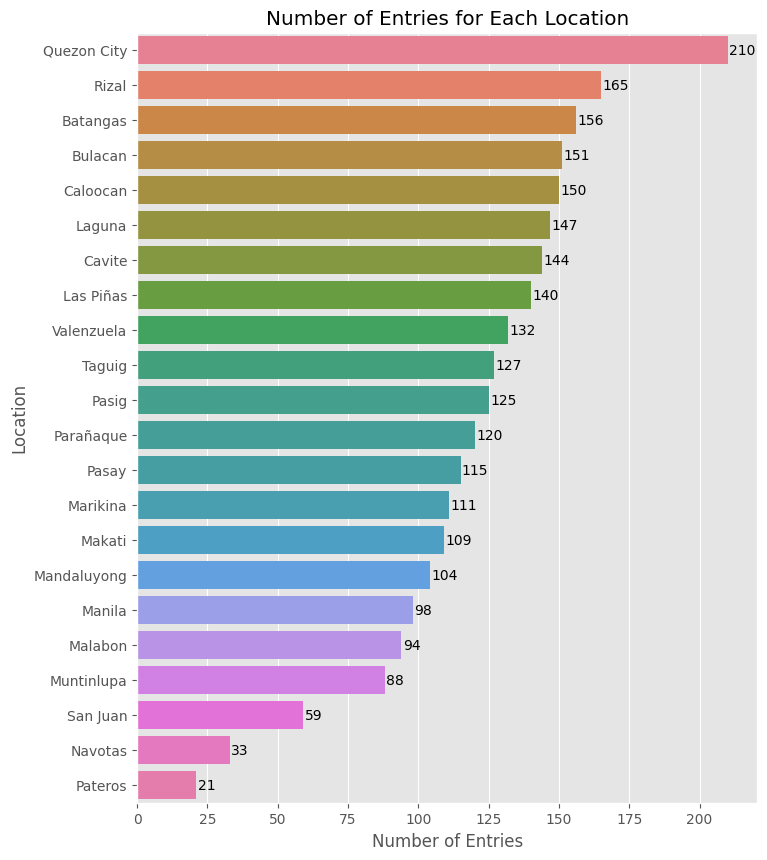

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

location_lengths = {location: len(location_dfs[location]) for location in locations}
location_lengths['Manila'] = len(location_dfs['Manila'])

sorted_location_lengths = dict(sorted(location_lengths.items(), key=lambda x: x[1], reverse=True))

total_count = sum(sorted_location_lengths.values())

plt.style.use('ggplot')
plt.figure(figsize=(8, 10))

palette = sns.color_palette("husl", len(sorted_location_lengths))

ax = sns.barplot(x=list(sorted_location_lengths.values()), 
                 y=list(sorted_location_lengths.keys()), 
                 hue=list(sorted_location_lengths.keys()),
                 palette=palette, 
                 dodge=False, 
                 legend=False)

plt.title('Number of Entries for Each Location')
plt.xlabel('Number of Entries')
plt.ylabel('Location')

for i, value in enumerate(sorted_location_lengths.values()):
    ax.text(value + 0.5, i, str(value), color='black', va='center')

print(f"Total count: {total_count}")

plt.show()


In [22]:
import os

folder_path = os.path.join(os.getcwd(), 'Google')

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

for location, df_location in location_dfs.items():
    file_name = 'GoogleSupply' + location.replace(' ', '') + '.csv'
    
    file_path = os.path.join(folder_path, file_name)
    
    df_location.to_csv(file_path, index=False)
    
    print(f"Saved {location} to {file_path}")
    
file_path = os.path.join(folder_path, 'GoogleSupply.xlsx')

with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    for location, df_location in location_dfs.items():
        sheet_name = 'GoogleSupply' + location.replace(' ', '')
        df_location.to_excel(writer, sheet_name=sheet_name, index=False)

Saved Manila to /home/eron/Notebooks/Cleaner/Google/GoogleSupplyManila.csv
Saved Batangas to /home/eron/Notebooks/Cleaner/Google/GoogleSupplyBatangas.csv
Saved Laguna to /home/eron/Notebooks/Cleaner/Google/GoogleSupplyLaguna.csv
Saved Cavite to /home/eron/Notebooks/Cleaner/Google/GoogleSupplyCavite.csv
Saved Rizal to /home/eron/Notebooks/Cleaner/Google/GoogleSupplyRizal.csv
Saved Bulacan to /home/eron/Notebooks/Cleaner/Google/GoogleSupplyBulacan.csv
Saved Mandaluyong to /home/eron/Notebooks/Cleaner/Google/GoogleSupplyMandaluyong.csv
Saved Marikina to /home/eron/Notebooks/Cleaner/Google/GoogleSupplyMarikina.csv
Saved Pasig to /home/eron/Notebooks/Cleaner/Google/GoogleSupplyPasig.csv
Saved Quezon City to /home/eron/Notebooks/Cleaner/Google/GoogleSupplyQuezonCity.csv
Saved San Juan to /home/eron/Notebooks/Cleaner/Google/GoogleSupplySanJuan.csv
Saved Caloocan to /home/eron/Notebooks/Cleaner/Google/GoogleSupplyCaloocan.csv
Saved Malabon to /home/eron/Notebooks/Cleaner/Google/GoogleSupplyMal